MONTE CARLO:A Simulação de Monte Carlo, também conhecida como Método de Monte Carlo ou uma simulação de probabilidade múltipla, é uma técnica matemática usada para estimar os possíveis resultados de um evento incerto.

DRAWDOWNS:Drawdown expressa quanto foi a queda do valor de um ativo em relação a sua cotação máxima. Dessa forma, o indicador pode ser utilizado para representar quanto dinheiro o investidor perdeu, em termos percentuais, em determinado ativo durante um período.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


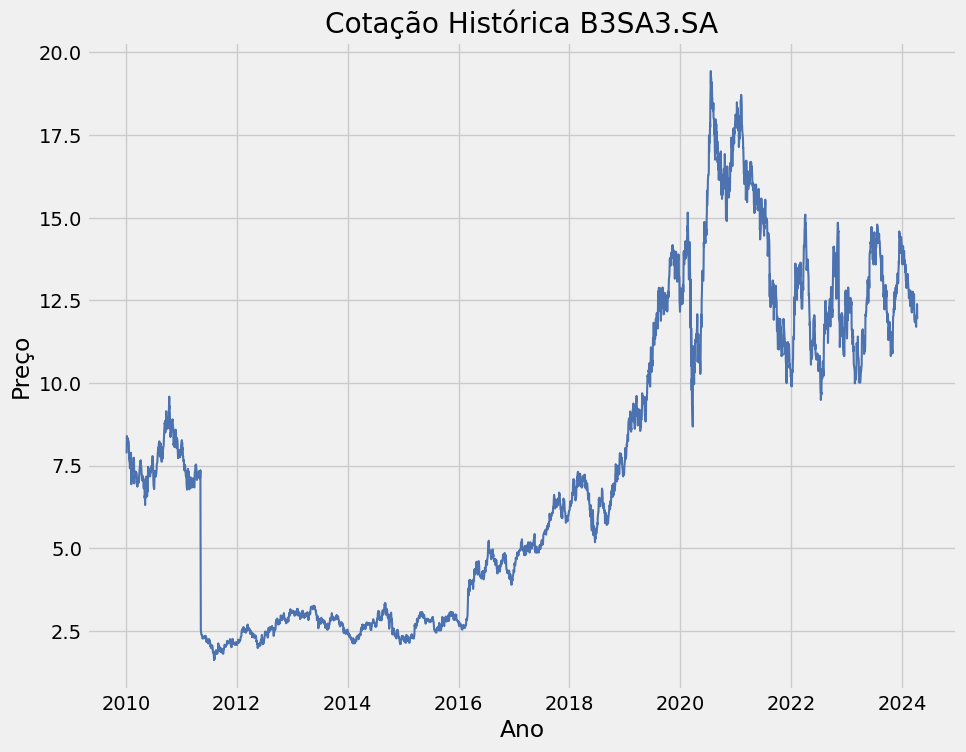

In [ ]:
plt.style.use("fivethirtyeight")
tickers = "B3SA3.SA"
start = "2010-01-01"
end = datetime.today().strftime("%Y-%m-%d")
df1 = yf.download(tickers, start, end)
with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10, 8))
    plt.plot(df1["Adj Close"], linewidth = 1.5)
    plt.xlabel("Ano")
    plt.ylabel("Preço")
    plt.title("Cotação Histórica " + tickers)

In [ ]:
# Calculando os retornos diários com o método pct_change(diferença percentual entre os valores na linha atual e na linha anterior)
df1["Retorno"] = df1["Adj Close"].pct_change(1)
retornos = df1["Adj Close"].pct_change(1).dropna().to_numpy()

In [ ]:
retornos

array([ 0.00386063,  0.03769199,  0.02372149, ...,  0.02143448,
       -0.03470543,  0.0016722 ])

In [ ]:
# Vamos considerar 2 anos para frente e que 1 ano tenha 252 dias úteis
anos = 3
num_dias = anos * 252
ultimo_preco = float(df1["Adj Close"].tail(1))

In [ ]:
ultimo_preco

11.979999542236328

In [ ]:
# E vamos calcular o drawdown máximo
# Simula os retornos diários dos próximos 3 anos
sim_ret = np.random.choice(retornos, size = num_dias, replace = True)

# Faz o cálculo do valor da carteira com retorno composto
sim_val = ultimo_preco*(1 + sim_ret).cumprod()

# Calcula o valor máximo da carteira simulada
max_val = np.maximum.accumulate(sim_val)

# Encontra o drawdown máximo
max_dd = np.max((max_val - sim_val)/max_val)

max_dd

0.4977820118042276

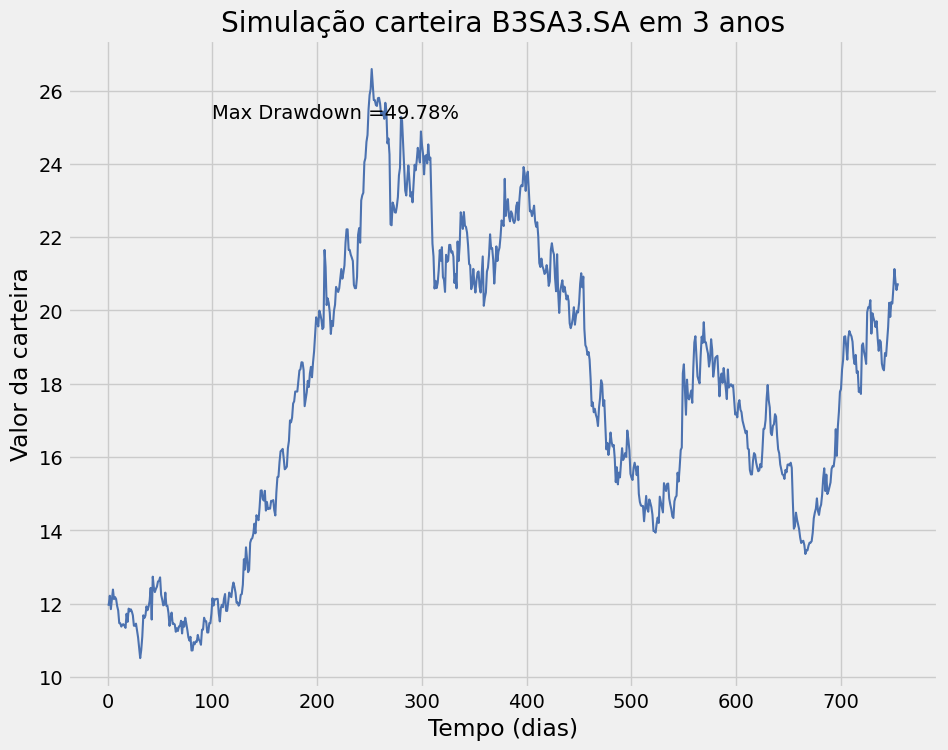

In [ ]:
# Visualização da simulação do valor da carteira

with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10, 8))
    plt.plot(sim_val, linewidth = 1.5)
    plt.xlabel("Tempo (dias)")
    plt.ylabel("Valor da carteira")
    plt.annotate("Max Drawdown =" + str(round(max_dd*100, 2)) + "%", (100, np.max(sim_val)*0.95))
    plt.title("Simulação carteira " + tickers + " em " + str(anos) + " anos")

In [ ]:
# Vamos ao Monte Carlo com X simulações

num_sim = 100000

drd = np.array([])

for n in range(num_sim):
    # Simula os retornos diários dos próximos 2 anos
    sim_ret = np.random.choice(retornos, size = num_dias, replace = True)

    # Faz o cálculo do valor da carteira com retorno composto
    sim_val = ultimo_preco*(1 + sim_ret).cumprod()

    # Calcula o valor máximo da carteira simulada
    max_val = np.maximum.accumulate(sim_val)

    # Encontra o drawdown máximo
    max_drd = np.max((max_val - sim_val)/max_val)
    drd = np.append(drd, max_drd)

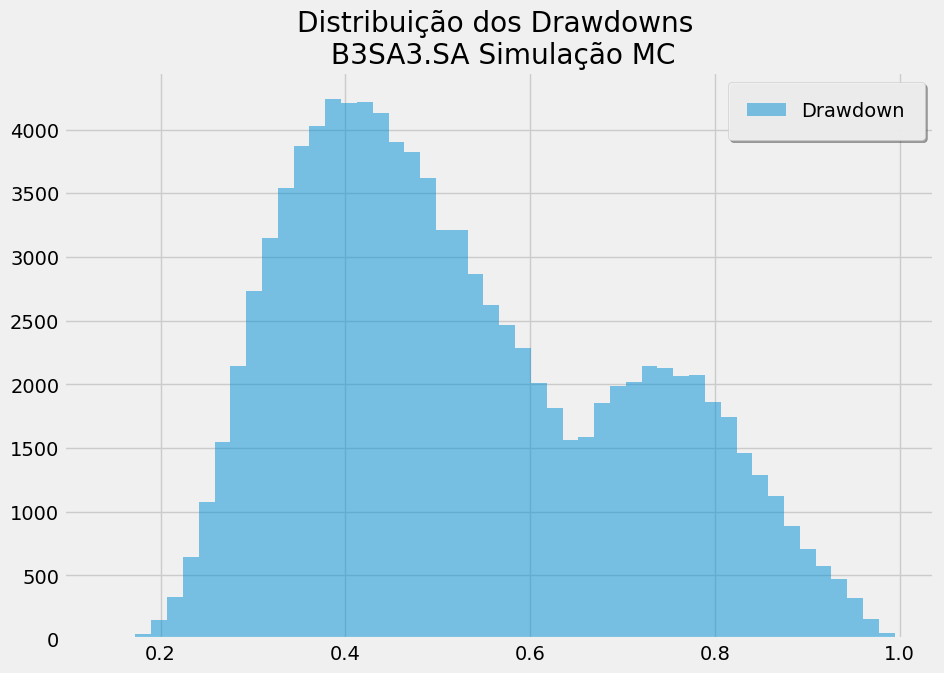

In [ ]:
# Vamos visualizar a distribuição dos drawdowns

config = dict(histtype = "stepfilled", alpha = 0.5, density = False, bins = 50)

plt.figure(figsize = (10,7))
plt.hist(drd, **config, label = "Drawdown")

# Formataçao da legenda - Valida para qualquer tipo de grafico
plt.legend(loc = "upper right"
           , frameon = True
           , ncol = 2
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)
plt.title("Distribuição dos Drawdowns \n " + tickers + " Simulação MC");

In [ ]:
# Por fim, as estatísticas importantes

print("Para o ativo " + tickers + " segundo uma simulação de Monte Carlo,")
print("com " + str(num_sim) + " simulações, em " + str(anos) + " anos podemos esperar:")
print("Drawdown médio " + str(round(np.mean(drd*100), 2)) + "%")
print("    50% de probabilidade, o DD será maior do que " + str(round(np.median(drd*100), 2)) + "%")
print("    25% de probabilidade, o DD será maior do que " + str(round(np.percentile(drd*100, 75), 2)) + "%")
print("     5% de probabilidade, o DD será maior do que " + str(round(np.percentile(drd*100, 95), 2)) + "%")
print("---------------------------------------------------------")
print()
print("Período dos parâmetros para a simulação: " + start  + " à " + end)

Para o ativo B3SA3.SA segundo uma simulação de Monte Carlo,
com 100000 simulações, em 3 anos podemos esperar:
Drawdown médio 52.74%
    50% de probabilidade, o DD será maior do que 49.13%
    25% de probabilidade, o DD será maior do que 66.88%
     5% de probabilidade, o DD será maior do que 84.77%
---------------------------------------------------------

Período dos parâmetros para a simulação: 2010-01-01 à 2024-04-12
